In [1]:
install.packages("forecast")

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library("forecast")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [3]:
AirPassengers

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : argumento formal "cols" corresponde a múltiplos argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . },

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [5]:
start(AirPassengers)

[1] 1949    1

In [6]:
end(AirPassengers)

[1] 1960   12

In [7]:
frequency(AirPassengers)

[1] 12

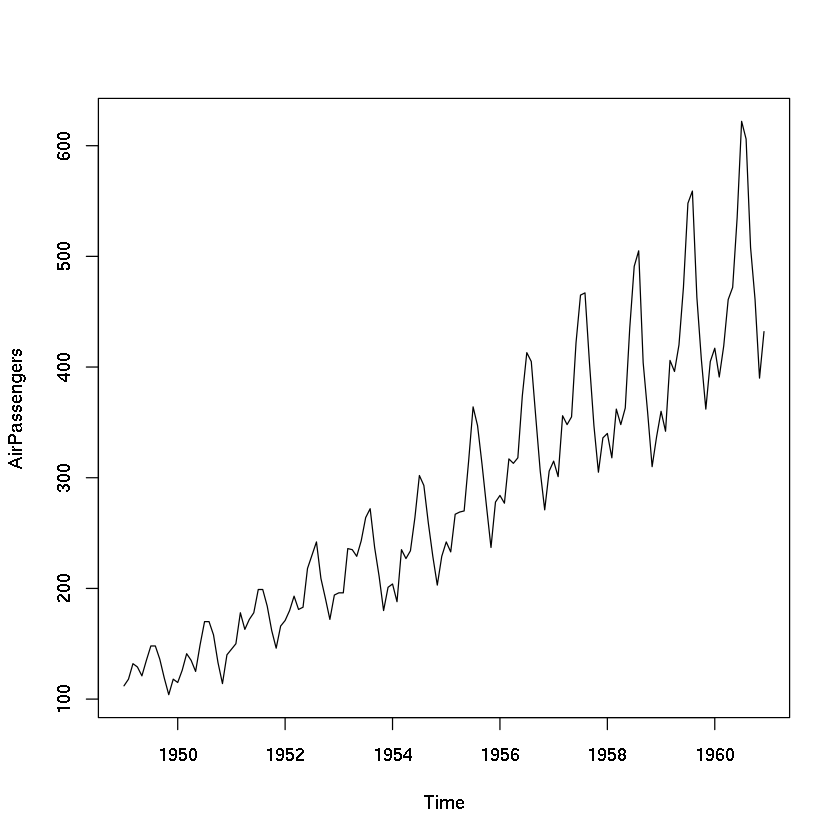

In [8]:
plot(AirPassengers) # Serie Temporal completa

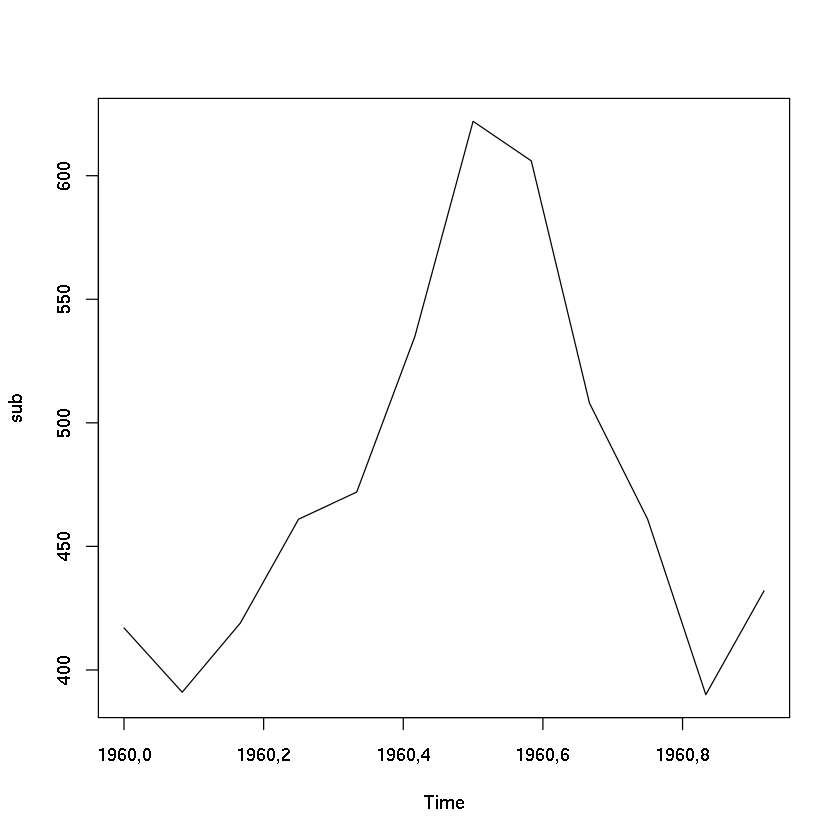

In [12]:
sub = window(AirPassengers, start = c(1960,1), end = c(1960,12))
plot(sub)

In [14]:
dec = decompose(AirPassengers)# separa os elementos da serie
dec

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1949 -24,748737 -36,188131  -2,241162  -8,036616  -4,506313  35,402778
1950 -24,748737 -36,188131  -2,241162  -8,036616  -4,506313  35,402778
1951 -24,748737 -36,188131  -2,241162  -8,036616  -4,506313  35,402778
1952 -24,7487

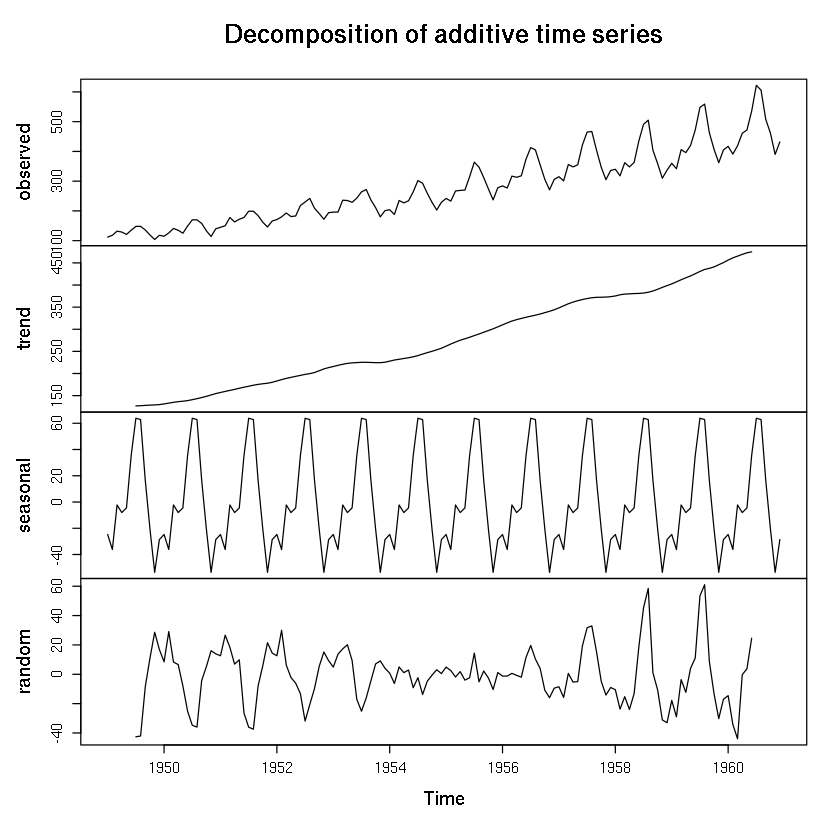

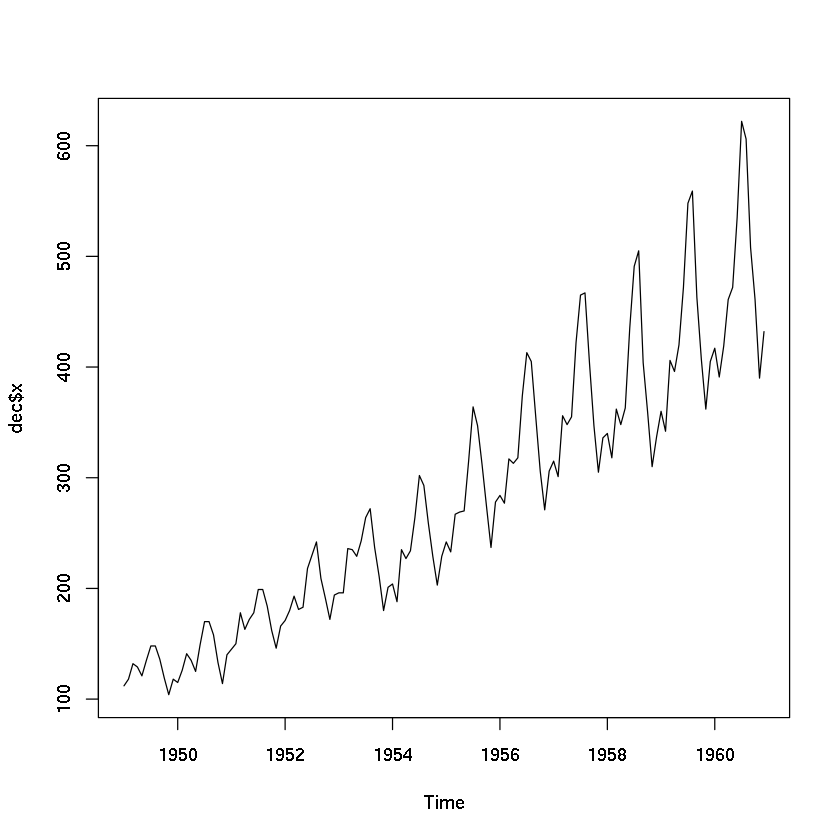

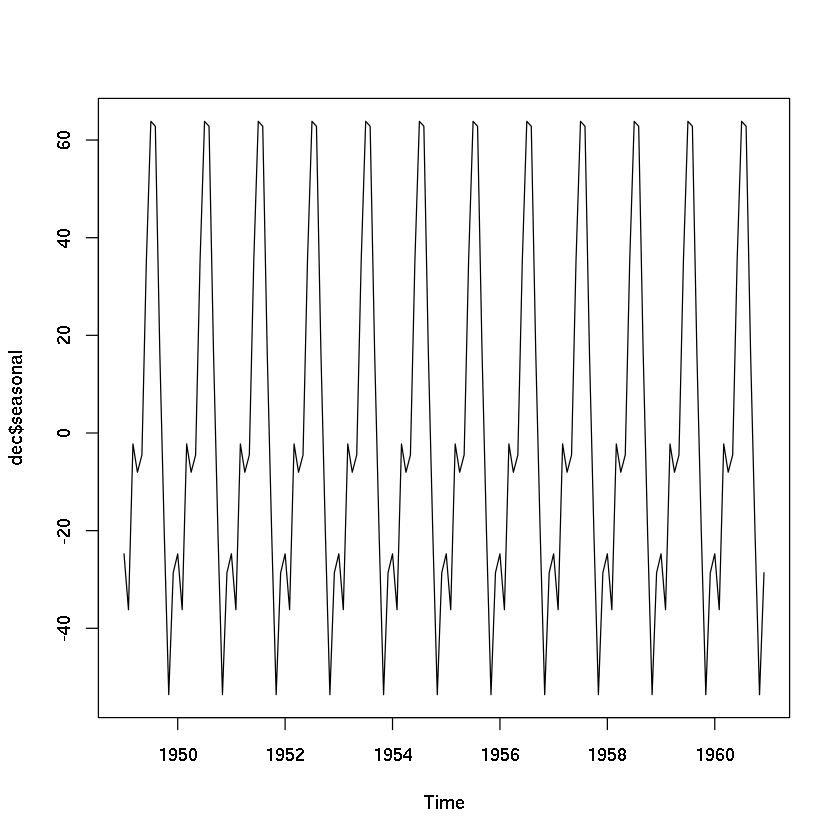

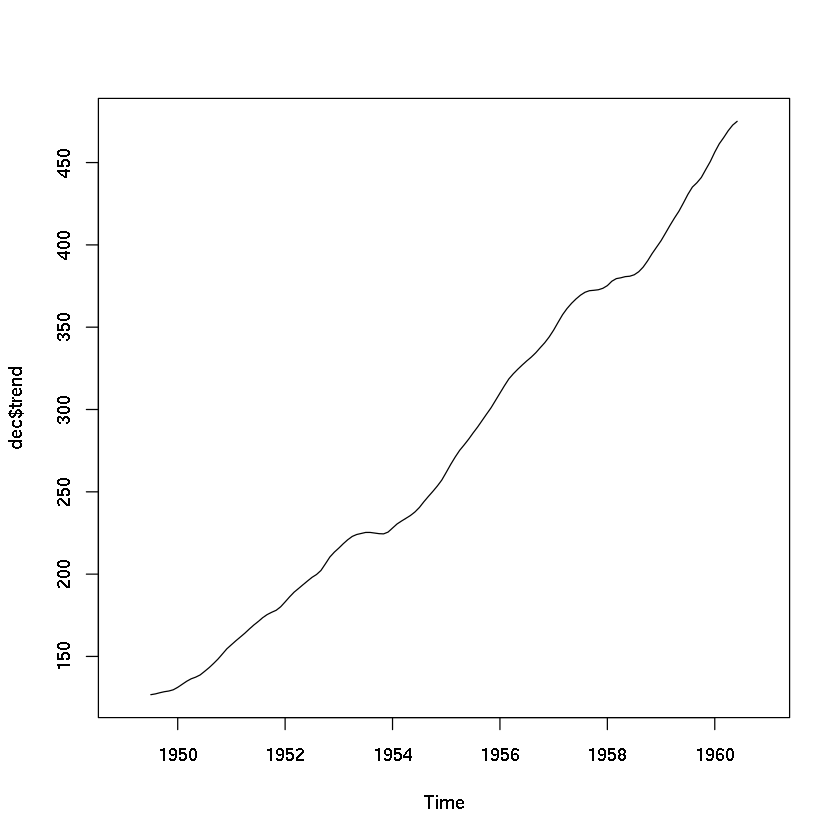

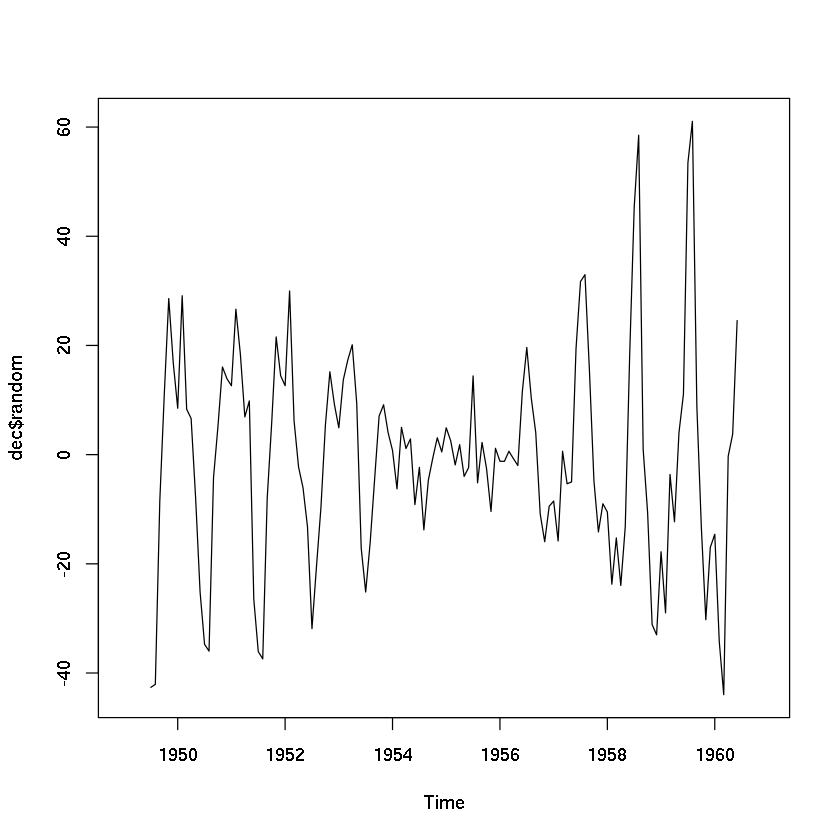

In [15]:
plot(dec)
plot(dec$x)
plot(dec$seasonal)
plot(dec$trend)
plot(dec$random)

In [16]:
ets = ets(AirPassengers) # suavização exponencial

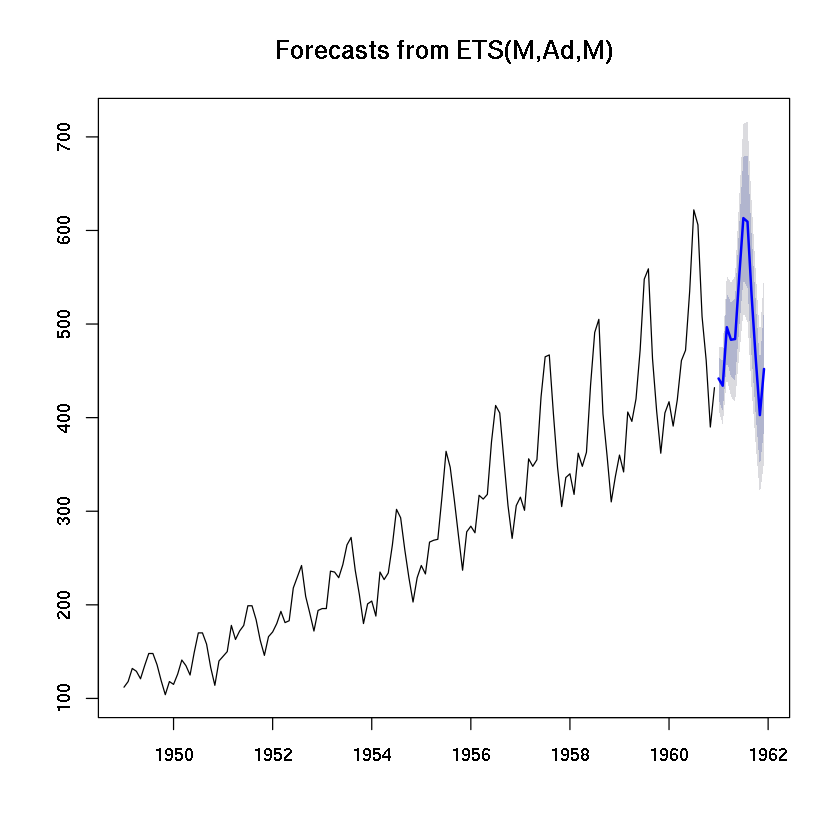

In [19]:
previsao = forecast(ets,h=12)
plot (previsao)

In [20]:
# Previsao com arima
arima = auto.arima(AirPassengers) # auto.arima pega o melhor modelo
arima

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0,5960  0,2143  -0,9819
s.e.  0,0888  0,0880   0,0292

sigma^2 estimated as 132,3:  log likelihood=-504,92
AIC=1017,85   AICc=1018,17   BIC=1029,35

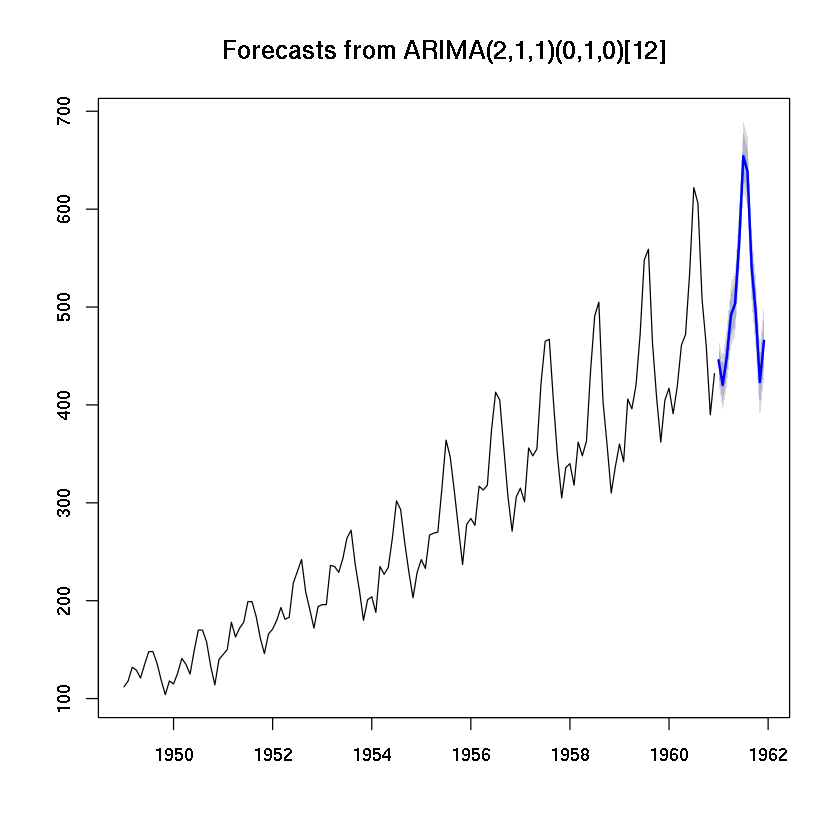

In [21]:
previsao_arima = forecast(arima,h=12) # fazendo a previsão
plot(previsao_arima)

In [23]:
previsao_arima # Lo e Hi são os intervalos de confiança baixo e alto de 80% e 95%

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       445,6349 430,8903 460,3795 423,0851 468,1847
Feb 1961       420,3950 403,0907 437,6993 393,9304 446,8596
Mar 1961       449,1983 429,7726 468,6241 419,4892 478,9074
Apr 1961       491,8399 471,0270 512,6529 460,0092 523,6707
May 1961       503,3945 481,5559 525,2330 469,9953 536,7937
Jun 1961       566,8625 544,2637 589,4612 532,3007 601,4242
Jul 1961       654,2602 631,0820 677,4384 618,8122 689,7081
Aug 1961       638,5975 614,9704 662,2246 602,4630 674,7320
Sep 1961       540,8837 516,9028 564,8647 504,2081 577,5594
Oct 1961       494,1266 469,8624 518,3909 457,0177 531,2356
Nov 1961       423,3327 398,8381 447,8273 385,8715 460,7940
Dec 1961       465,5076 440,8229 490,1923 427,7556 503,2596